# COGS 108 - Final Project 

# Overview

With over 650,000 restaurants in the U.S. since 2018, restaurant owners face a lot of competition in the industry(1).  In the midst of all this competition there are a lot of restaurant closures. In fact, most restaurants don’t make it past one year of operation, and of those that do, 70% of them will shut down within 3-5 years(2). Our project endeavours to use data science in order to help up and coming restaurant owners make well informed decisions that will aid in keeping them afloat against all the competition.  We hope that by determining what the best location is to open a restaurant, along with what type of restaurant would be most lucrative there, these businesses will have a good foundation to be successful. 

References

1) https://www.statista.com/statistics/244616/number-of-qsr-fsr-chain-independent-restaurants-in-the-us/ 

2) https://yourbusiness.azcentral.com/average-life-span-restaurant-6024.html


# Names

- Ting-Wei Lee
- Sparsh Shah
- Nessa Vu
- Hexuan Zhang
- Mingjie Zhu

# Research Question

Where should a new restaurant be opened in Las Vegas to gather more customers and be successful?
More specifically, given a geographical region, what specific location and restaurant type is optimal for a business owner to build in order to receive the most influx of customers?


# Background and Prior Work

We found this question interesting because we observed some places have more frequent restaurant closing but some places don’t. We are triggered by this fact and we want to figure out how can location affect the degree of success of a restaurant. We found a research project online called “Using Yelp Data to Predict Restaurant Closure”(1). One of its conclusions is that opening a new restaurant in a high restaurant density place typically yields a negative outcome, unless it’s a place with restaurants serving similar food. This article leads us to our hypothesis: a restaurant will do better on average if they open in close proximity to restaurants of similar types, than if they open in close proximity to restaurants that are of dissimilar types. 
	
While Las Vegas is known for its entertainment industry, it is increasingly becoming a ‘foodie destination’ (2). More than 60 new restaurants opened in 2014, all vying to serve the nearly 40 million annual tourists and take a portion of the estimated $8 billion that the restaurant industry makes in Las Vegas(3). Thus, while restaurant owners may find Las Vegas an enticing location to open a new restaurant, it is unavoidable for one to open a new restaurant here without competition. Then our research question will be crucial for those future business holder in Vegas, because they are facing a very fierce competition, it will be very helpful for them to have some tips on the location of their new business. 
    
We looked at the review counts of the restaurants, and we observed that some of the review counts are very small, and the data of those restaurants should not be treated as statistically convincing. Thus, we chose number 100, a large number in statistics, as the threshold for the restaurants that we would analyze.

References (include links):

1) https://towardsdatascience.com/using-yelp-data-to-predict-restaurant-closure-8aafa4f72ad6 

2) https://www.ktnv.com/news/why-las-vegas-is-becoming-a-foodie-paradise 

3) https://www.businessinsider.com/las-vegas-food-scene-2014-4


# Hypothesis


Based on the research we have done, we hypothesize that a restaurant best set up for success will be one that is built in an area with many high ranking restaurants, given that the restaurant built is also of similar category or type as the restaurants residing in that area. For example, if we found that the location with the most popular and well reviewed restaurants in San Diego county was found in Kearny Mesa, we would then find the most popular category of food in that area. If the most popular food category in Kearny Mesa was Japanese food, we would conclude that a new restaurant with the highest chance of success would be a Japanese restaurant opened in Kearny Mesa. 

This seems rational because, for instance, if one wanted to eat Chinese food, they would probably think to go to Chinatown because of its reputation of quantity and quality of Chinese food. Opening a Chinese restaurant here would be beneficial because customers are already coming to that area for Chinese food, and are open to going to that new restaurant since they are in the area (especially if the other successful Chinese restaurants are crowded).


# Dataset(s)

- Dataset Name: Yelp
- Link to the dataset: https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6 
- Number of observations: 174,567 entries

Yelp is a “local-search service powered by crowd-sourced review forum” that covers a large range of businesses. For our purposes, we will be focusing on the restaurants that are featured on Yelp. Yelp is an important tool for customers searching for food, products, stores, and services, but it is an even more important tool for business owners.  Yelp is a great way for  businesses, especially small or new businesses, to increase traffic and revenue. In fact, on average, small businesses with Yelp accounts see an increase of $8,000 in annual revenue(1). In addition to helping business owners increase traffic, we wanted to see how else Yelp can be used to help restaurant owners. 

The Yelp dataset includes a collection of businesses entries stored in a business.json file. Each entry has various attributes including location data, review data, and business type, and information about the business. There are over 174,000 businesses included in the dataset, featuring 11 metropolitan areas. Also included in the downloaded dataset were: review.json (full review written by users and their user id’s), user.json(Yelp users’ data), checkin.json (the log of check in’s to a business), tip.json (tips written by users about businesses, including users’ id’s), and finally photo.json (photos uploaded to Yelp and their captions and classifications). Our team opted to not utilize these data files because we felt they would not help us answer our research question, and they include user data that may possibly pose ethical concerns. Since our group felt it would be easier to work with a csv file as opposed to a json file, we found a public source that had already converted the file into a json file. This source is linked above.

References

1) https://brandongaille.com/9-compelling-statistics-and-trends-about-yelp-reviews/ 


# Setup

We first load our modules. We are using the pandas library to read in our json data file as a table. We are using the numpy library to assist us in performing empirical analysis of our data. We use the matplotlib.pyplot and seaborn libraries to produce data visualizations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import logging
from IPython.core.display import HTML


We then configure our seaborn library to help make our plots look more neat.

In [2]:
sns.set()
sns.set_context('talk')

To display our plots directly in the notebook rather than in a new window, we implement the following command.

In [3]:
%matplotlib inline

# Data Cleaning

We first read in our json data file into a dataframe using pandas. 

In [4]:
df = pd.read_json('business.json', lines = True)
df


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH


The file that has been read in contains columns that we do not necessarily need to perform our analysis, such as: address, attributes, business_id, hours, is_open, latitude, longitude, name, state. We will drop these columns as the first part of our data cleaning.

In [5]:
df_clean = df.drop(['address', 'business_id', 'latitude', 'longitude', 'state', 'hours', 'is_open', 'attributes', 'name'], axis = 1)
df_clean


,categories,city,postal_code,review_count,stars
0,"Golf, Active Life",Phoenix,85016,5,3.0
1,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,L5R 3E7,128,2.5
2,"Sushi Bars, Restaurants, Japanese",Charlotte,28210,170,4.0
3,"Insurance, Financial Services",Goodyear,85338,3,5.0
4,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,28217,4,4.0
5,"Shipping Centers, Couriers & Delivery Services...",Mississauga,L5V 0B1,3,2.5
6,"Beauty & Spas, Hair Salons",Calgary,T2Z 1K4,7,3.5
7,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,89121,3,3.5
8,"Nail Salons, Beauty & Spas, Day Spas",Glendale,85308,8,5.0
9,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,44126,8,4.5


Now that we have dropped these columns, we want to get the data of businesses that are only in Las Vegas, so select only the businesses with the “city” column listed as “Las Vegas”.

In [6]:
df_vegas = df_clean[(df_clean['city'] == 'Las Vegas')]
df_vegas


,categories,city,postal_code,review_count,stars
7,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,89121,3,3.5
17,"Restaurants, Italian",Las Vegas,89119,40,4.0
18,"Event Planning & Services, Photographers, Prof...",Las Vegas,89121,21,5.0
20,"Arcades, Arts & Entertainment",Las Vegas,89101,38,4.5
22,"Nightlife, Arts & Entertainment, Bars, Strip C...",Las Vegas,89118,107,4.0
24,"Women's Clothing, Shopping, Accessories, Fashi...",Las Vegas,89149,4,5.0
25,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,89156,184,4.5
28,"Car Rental, Windshield Installation & Repair, ...",Las Vegas,89102,52,4.5
30,"Shopping, Home & Garden, Department Stores, Me...",Las Vegas,89117,38,3.5
34,"Home Services, Real Estate, Financial Services...",Las Vegas,89108,19,1.5


Now that we have our dataset of only businesses operating in Las Vegas, we can drop the ‘city’ column from our dataframe.

In [7]:
df_vegas = df_vegas.drop(['city'], axis = 1)
df_vegas


,categories,postal_code,review_count,stars
7,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",89121,3,3.5
17,"Restaurants, Italian",89119,40,4.0
18,"Event Planning & Services, Photographers, Prof...",89121,21,5.0
20,"Arcades, Arts & Entertainment",89101,38,4.5
22,"Nightlife, Arts & Entertainment, Bars, Strip C...",89118,107,4.0
24,"Women's Clothing, Shopping, Accessories, Fashi...",89149,4,5.0
25,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",89156,184,4.5
28,"Car Rental, Windshield Installation & Repair, ...",89102,52,4.5
30,"Shopping, Home & Garden, Department Stores, Me...",89117,38,3.5
34,"Home Services, Real Estate, Financial Services...",89108,19,1.5


Furthermore, we would like to only analyze businesses that are restaurants or food-related, so we filter our data to only contain businesses that have the words “Restaurants” and “Food” in the “Categories” column. 

In [8]:
restaurants = df_vegas['categories'].astype(str).str.contains('Restaurants')
food = df_vegas['categories'].astype(str).str.contains('Food')

data_list = [any(tup) for tup in zip(restaurants, food)]

df_vegas = df_vegas[data_list]
df_vegas


,categories,postal_code,review_count,stars
17,"Restaurants, Italian",89119,40,4.0
25,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",89156,184,4.5
43,"Local Services, Food Banks, Community Service/...",89115,44,5.0
75,"Fast Food, Food, Restaurants, Ice Cream & Froz...",89146,33,2.0
101,"Food, Donuts",89121,6,4.0
111,"Restaurants, Chinese",89030,4,2.0
128,"Food, Coffee & Tea",89134,76,4.0
135,"Restaurants, Pizza, Italian, American (New)",89102,3,2.0
173,"Food, Pizza, Wine Bars, Bars, Restaurants, Nig...",89102,3,4.5
174,"French, Restaurants, Creperies",89109,535,3.5


For our finalized dataframe, we are only considering businesses with at least 100 reviews, and so we create a dataframe with only businesses that have 100 or greater in the “review_count” column.

In [9]:
df_final = df_vegas[(df_vegas['review_count'] >= 100)]
df_final = df_final.dropna()
df_final


,categories,postal_code,review_count,stars
25,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",89156,184,4.5
174,"French, Restaurants, Creperies",89109,535,3.5
176,"Buffets, Restaurants",89102,287,3.0
494,"Restaurants, Pizza",89131,303,3.5
542,"Fast Food, Mexican, Restaurants",89109,115,3.5
693,"Pizza, Salad, Restaurants, Italian",89109,296,3.5
718,"Chinese, Seafood, Cantonese, Noodles, Restaurants",89139,101,4.0
1095,"Korean, Restaurants",89123,292,3.5
1166,"Italian, Pizza, Restaurants",89113,106,3.0
1413,"Local Flavor, Food, Restaurants, Vietnamese",89102,244,3.0


# Data Visualization

Figure 1: Histogram of the star ratings in our final dataframe. It is left-skewed, with the peak being around 4 stars. As restaurants with a lower star rating are outliers in this distribution, this indicates that most restaurants that are still in business have a star rating close to 4 stars. This affirms that running a successful restaurant business is positively correlated with the restaurant’s star rating. Restaurants with a star rating of around of above 4 stars will tend to be more successful. This supports our choice of 89120 as the zip code with the most successful restaurant businesses, as it has an average star rating of 4.06, which is above 4 stars.

Text(0.5, 1.0, 'Figure 1: Histogram Distribution of Star Ratings')

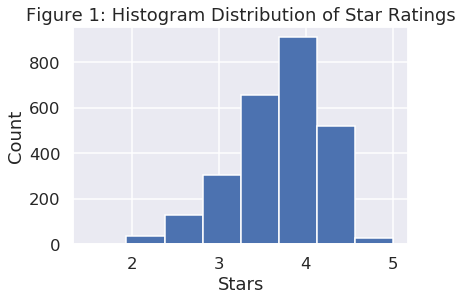

In [12]:
plt.hist(df_final['stars'], bins = 8)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Figure 1: Histogram Distribution of Star Ratings')


Figure 2: The regression of stars on review count shows that there is a positive correlation between the number of reviews and the rating of the restaurant. This supports our decision to factor in the number of reviews for a restaurant into our assessment of which is the best zip code to establish a restaurant business. Hence, by selecting only restaurants that have 100 or more reviews, we are increasingly the likelihood of us settling on a zip code with the best success, and reviews and ratings work in conjecture to support our claim for what the best zip code is.

Text(0.5, 1.0, 'Figure 2: Scatter Plot for Reviews and Ratings')

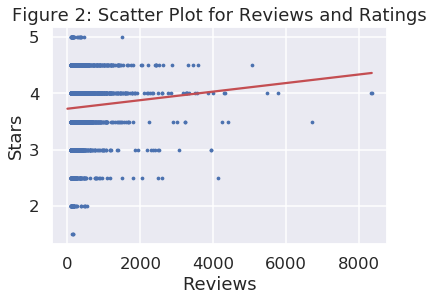

In [13]:
slope, intercept = np.polyfit(df_final['review_count'], df_final['stars'], 1)
pred_stars = slope * np.arange(max(df_final['review_count'])) + intercept
plt.scatter(df_final['review_count'], df_final['stars'], s = 5)
plt.plot(np.arange(max(df_final['review_count'])), pred_stars, 'r')
plt.xlabel('Reviews')
plt.ylabel('Stars')
plt.title('Figure 2: Scatter Plot for Reviews and Ratings')


Below is a word frequency visualization of the categories found in the 89120 zip code. We will use a WordCloud from https://github.com/kavgan/word_cloud to generate a word cloud of the categories of restaurants in our zip code 89120. The code below is not our own and belongs to the Github user kavgan:

In [25]:
class WordCloud:

    def __init__(self, stopwords=[], use_tfidf=False):

        self.use_tfidf = use_tfidf
        self.data = []
        self.color_choices = ['#b82c2c',
                              '#a55571',
                              '#bc72d0',
                              '#8000FF',
                              '#3498DB',
                              '#FF5733',
                              '#223AE6',
                              '#2ECC71',
                              '#5F6A6A',
                              '#6C22E6',
                              '#CE22E6',
                              '#ACB02E',
                              '#B18904',
                              '#848484',
                              '#04B404',
                              '#5882FA',
                              '#FF0080',
                              '#0489B1',
                              '#FA5858',
                              '#DBA901',
                              '#00b4ff',
                              '#008080',
                              '#003366',
                              '#725394'
                              ]
        self.color_choices = ['#b82c2c',
                              '#a55571',
                              '#bc72d0',
                              '#8000FF',
                              '#3498DB',
                              '#FF5733',
                              '#223AE6',
                              '#2ECC71',
                              '#5F6A6A',
                              '#6C22E6',
                              '#CE22E6',
                              '#ACB02E',
                              '#B18904',
                              '#848484',
                              '#04B404',
                              '#5882FA',
                              '#FF0080',
                              '#0489B1',
                              '#FA5858',
                              '#DBA901',
                              '#00b4ff',
                              '#008080',
                              '#003366',
                              '#725394'
                              ]

        # load a set of stop words
        self.stopwords = stopwords

    def get_color_code(self, score):
        """Get the appropriate color codes."""

        step = 0.05
        current_incremented_score = 0
        idx = 0

        while current_incremented_score < 1:
            if score <= current_incremented_score:
                return self.color_choices[idx]
            idx += 1
            current_incremented_score = current_incremented_score + step

        return self.color_choices[0]


    def get_font_size(self, score: float):
        """Increment scale until score almost equals current_incremented_score."""

        # font size start and increment
        scale = 0.5
        max_scale = 2.5
        scale_step = 0.15

        # score increment
        score_step = 0.05
        current_incremented_score = 0

        while current_incremented_score < 1:

            # increment scale until score almost equals current_incremented_score
            # the larger the score, the more the scale increment
            if score <= current_incremented_score:
                return scale

            current_incremented_score = current_incremented_score + score_step
            scale += scale_step

            #if scale > max_scale:
             #   scale = max_scale

        return scale

    def get_embed_code(self, text_scores: pd.DataFrame = None, text: list = [], topn=100, random_color=True):

        if text_scores is None and len(text) > 0:
            items = self.extract_topn_from_vector(text, topn=topn)
            text_df = pd.DataFrame(items, columns=['words', 'score'])
        elif text_scores is not None:
            text_df = text_scores
            text_df.columns = ['words', 'score']
        else:
            logging.error(
                "There is a problem with your input text. Did you provide any?")
            return

        if random_color:
            random.shuffle(self.color_choices)

        word_cloud_items = []

        html = [
            "<div align='center' style='width:100%'><div align='center' style='text-align:justify; border-radius: 25px;background: #fff7f7;overflow: auto; width:500px !important; padding:20px; '; text-align: center; word-wrap: break-word;>"]
        for idx, row in text_df.iterrows():
            word = row.words.replace(" ", "-")
            scale = self.get_font_size(row.score)
            color_code = self.get_color_code(row.score)
            word_cloud_items.append(
                " <span style='color:{0};font-size:{1}em;white-space: normal;font-family:verdana;display: inline-block;line-height:30px'>{2}&nbsp;</span>".format(
                    color_code, scale, word))

        random.shuffle(word_cloud_items)
        random.shuffle(word_cloud_items)

        html.extend(word_cloud_items)
        html.append("</div></div>")
        return ''.join(html)

    def sort_coo(self, coo_matrix):
        tuples = zip(coo_matrix.col, coo_matrix.data)
        return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)


    def get_ranks(self,word_vector):
        """Get normalized tf."""

        max = np.max(word_vector)

        # normalize raw counts
        word_count_vector = np.multiply(word_vector, 1/(max))

        return word_count_vector

    def get_normalized_tf(self, cv: CountVectorizer, text: list):
        """Get normalized tf."""

        big_text = ' '.join(text)
        word_count_vector = cv.fit_transform([big_text])
        max = np.max(word_count_vector)

        # normalize raw counts
        word_count_vector = np.multiply(word_count_vector, 1/(max))

        return word_count_vector

    def get_tfidf_scores(self, cv: CountVectorizer, text: list):
        """Get tfidf values."""

        word_count_vector = cv.fit_transform(text)

        big_text = ' '.join(text)

        # compute word scores
        tfidf_transformer = TfidfTransformer(
            smooth_idf=False, use_idf=True, norm='l2')
        tfidf_transformer.fit(word_count_vector)
        tf_idf_vector = tfidf_transformer.transform(cv.transform([big_text]))

        return tf_idf_vector

    def extract_topn_from_vector(self, text: list, topn=10):
        """Extract keywords based on tf-idf score."""

        # get word count
        cv = CountVectorizer(stop_words=self.stopwords)

        word_scores_vector = None
        if self.use_tfidf:
            word_scores_vector = self.get_tfidf_scores(cv, text)
        else:
            word_scores_vector = self.get_normalized_tf(cv, text)

        #word_scores_vector=self.get_ranks(word_scores_vector)

        # sort the tf-idf vectors by descending order of scores
        sorted_items = self.sort_coo(word_scores_vector.tocoo())
        sorted_items = sorted_items[:topn]



        final_items = []

        # word index and corresponding tf-idf score
        for idx, score in sorted_items:
            final_items.append([cv.get_feature_names()[idx], score])

        return final_items

categories_list = [category for category in df_89120['categories']]
categories_list_split = []
for category in categories_list:
    split_list = category.split(',')
    for word in split_list:
        if word.strip() != 'Restaurants':
            categories_list_split.append(word.strip())
categories_list_split

wc = WordCloud(use_tfidf = False)

embed_code = wc.get_embed_code(text = categories_list_split, random_color = False, topn = 40)
HTML(embed_code)


Figure 3: From the above word cloud, we can see that the most popular restaurant categories in the zip code 89120 are Vegan and Vegetarian, Brunch & Breakfast, Mexican, and Chinese.

# Data Analysis & Results

We want to determine the best location to set up a successful restaurant business in Las Vegas, and we are determining this based on zip code. Therefore, we will calculate the mean star rating for restaurants in each zip code in Las Vegas. The first step of this process is to determine what the unique zip codes in this data set are.

In [15]:
zip_codes = [code for code in df_final['postal_code']]
zip_codes_unique = []
for code in zip_codes:
    if code not in zip_codes_unique:
        zip_codes_unique.append(code)
zip_codes_unique.sort()
zip_codes_unique

len(zip_codes_unique)


54

We have just created a list of all the zip codes in Las Vegas that appear in our cleaned dataframe, and we have found that there are 54 unique zip codes that we are working with. We will now find the average star rating for restaurants in each zip code. We will do this by creating a dictionary with each unique zip code as a key, and the star ratings for each restaurant in that zip code as its key values.

In [16]:
zip_dict = {}
for code in zip_codes_unique:
    zip_dict[code] = []
for i in range(len(df_final)):
    zip_dict[[postal for postal in df_final.iloc[[i]]['postal_code']][0]].append([rating for rating in df_final.iloc[[i]]['stars']][0])
zip_dict

{'89012': [4.5],
 '89014': [4.5, 4.0],
 '89019': [3.5],
 '89030': [3.5],
 '89032': [3.5],
 '89052': [4.0, 4.5],
 '89084': [3.5],
 '89101': [3.0,
  4.0,
  4.0,
  4.5,
  3.5,
  4.5,
  3.0,
  4.5,
  4.5,
  4.5,
  4.5,
  3.5,
  3.5,
  3.5,
  4.0,
  4.5,
  4.5,
  3.0,
  4.0,
  4.5,
  3.0,
  4.0,
  4.0,
  3.5,
  3.5,
  4.5,
  4.5,
  4.5,
  4.5,
  3.5,
  4.0,
  4.0,
  3.0,
  3.5,
  2.5,
  4.0,
  3.5,
  4.0,
  4.0,
  3.0,
  4.0,
  2.5,
  3.0,
  2.5,
  4.5,
  4.0,
  4.5,
  4.5,
  4.5,
  4.5,
  3.5,
  3.5,
  4.0,
  3.5,
  4.0,
  5.0,
  4.5,
  4.0,
  4.0,
  4.0,
  4.5,
  4.0,
  4.0,
  4.5,
  3.5,
  4.5,
  3.0,
  4.5,
  3.0,
  4.5,
  4.0,
  4.5,
  3.0,
  3.5,
  3.5,
  4.5,
  4.0,
  4.0,
  4.0,
  4.5,
  4.5,
  4.0,
  4.0,
  3.0,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  4.0,
  2.5,
  4.0,
  4.0,
  3.5,
  4.0,
  3.5,
  4.0,
  4.0,
  4.5,
  3.0,
  3.5,
  4.5,
  4.5,
  4.0,
  3.0,
  4.5,
  4.0,
  4.0,
  4.5,
  4.0,
  4.5,
  4.0,
  4.5,
  4.0,
  4.5,
  4.0,
  3.5,
  3.0,
  3.5,
  4.5],
 '89102': [3.0,
  3.0

We want to find the zip code that has the best star rating. However, if a zip code only has one restaurant and that restaurant has the highest star rating amongst all the restaurants in our data set, then we would end up selecting a zip code with only one restaurant. However, we want a zip code with multiple restaurants and multiple categories, as this is in line with our project goal.
Therefore, we first find the average number of restaurants per zip code in our dictionary. This will be our benchmark for the minimum number of restaurants that our selected zip code must have.


In [17]:
count = 0
for zip_code in zip_dict:
    for restaurant in zip_code:
        count += 1
avg_restaurants_per_zip = count / len(zip_dict)
avg_restaurants_per_zip


5.0

We have found that the average number of restaurants per zip code is 5. Therefore, we will filter out all zip codes that have less than 5 restaurants by making a final zip code dictionary with only zip codes that have 5 or more restaurants.


In [18]:
zip_dict_final = {}
for code in zip_codes_unique:
    if len(zip_dict[code]) >= avg_restaurants_per_zip:
        zip_dict_final[code] = zip_dict[code]
zip_dict_final


{'89101': [3.0,
  4.0,
  4.0,
  4.5,
  3.5,
  4.5,
  3.0,
  4.5,
  4.5,
  4.5,
  4.5,
  3.5,
  3.5,
  3.5,
  4.0,
  4.5,
  4.5,
  3.0,
  4.0,
  4.5,
  3.0,
  4.0,
  4.0,
  3.5,
  3.5,
  4.5,
  4.5,
  4.5,
  4.5,
  3.5,
  4.0,
  4.0,
  3.0,
  3.5,
  2.5,
  4.0,
  3.5,
  4.0,
  4.0,
  3.0,
  4.0,
  2.5,
  3.0,
  2.5,
  4.5,
  4.0,
  4.5,
  4.5,
  4.5,
  4.5,
  3.5,
  3.5,
  4.0,
  3.5,
  4.0,
  5.0,
  4.5,
  4.0,
  4.0,
  4.0,
  4.5,
  4.0,
  4.0,
  4.5,
  3.5,
  4.5,
  3.0,
  4.5,
  3.0,
  4.5,
  4.0,
  4.5,
  3.0,
  3.5,
  3.5,
  4.5,
  4.0,
  4.0,
  4.0,
  4.5,
  4.5,
  4.0,
  4.0,
  3.0,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  4.0,
  2.5,
  4.0,
  4.0,
  3.5,
  4.0,
  3.5,
  4.0,
  4.0,
  4.5,
  3.0,
  3.5,
  4.5,
  4.5,
  4.0,
  3.0,
  4.5,
  4.0,
  4.0,
  4.5,
  4.0,
  4.5,
  4.0,
  4.5,
  4.0,
  4.5,
  4.0,
  3.5,
  3.0,
  3.5,
  4.5],
 '89102': [3.0,
  3.0,
  2.0,
  4.0,
  4.0,
  4.5,
  3.0,
  4.5,
  4.0,
  3.5,
  3.5,
  4.0,
  3.5,
  4.0,
  3.0,
  3.0,
  4.0,
  4.0,
  4.0,
  4.5,
 

To finalize our dictionary, will convert the key values into the average star rating for each zip code so that we have a dictionary with each zip code and its average star rating.

In [19]:
for code in zip_dict_final:
    zip_dict_final[code] = np.mean(zip_dict_final[code])
zip_dict_final


{'89101': 3.8916666666666666,
 '89102': 3.8216560509554141,
 '89103': 3.657142857142857,
 '89104': 3.9150943396226414,
 '89106': 4.0,
 '89107': 3.8214285714285716,
 '89108': 3.6000000000000001,
 '89109': 3.5747572815533979,
 '89110': 3.7222222222222223,
 '89113': 3.6692307692307691,
 '89115': 3.6666666666666665,
 '89117': 3.8389830508474576,
 '89118': 3.8536585365853657,
 '89119': 3.6620111731843576,
 '89120': 4.0588235294117645,
 '89121': 3.9399999999999999,
 '89122': 3.4500000000000002,
 '89123': 3.8333333333333335,
 '89128': 3.8833333333333333,
 '89129': 3.8541666666666665,
 '89130': 3.7777777777777777,
 '89131': 3.6666666666666665,
 '89134': 3.8999999999999999,
 '89135': 3.5746268656716418,
 '89136': 3.5,
 '89139': 3.86046511627907,
 '89141': 3.4166666666666665,
 '89145': 3.7857142857142856,
 '89146': 4.0446428571428568,
 '89147': 3.9375,
 '89148': 3.9626865671641789,
 '89149': 3.609375,
 '89158': 3.9166666666666665,
 '89169': 3.8235294117647061,
 '89178': 3.6111111111111112,
 '891

Now that we have our finalized zip code dictionary, we will find the best star rating amongst all the zip codes.

In [20]:
best_rating = 0
for code in zip_dict_final:
    if zip_dict_final[code] > best_rating:
        best_rating = zip_dict_final[code]
best_rating


4.0588235294117645

The best rating that we have found rounds to 4.06. Now that we have this rating, we will find all the zip codes that have this rating, and add them to a list.

In [22]:
best_zip_codes = []
for code in zip_dict_final:
    if zip_dict_final[code] == best_rating:
        best_zip_codes.append(code)
best_zip_codes


['89120']

This list only contains one zip code: 89120. Therefore, this is the zip code that we have identified as being the best zip code for a restaurant owner to set up their new business. For convenience, we will make a new dataframe with only restaurants in this zip code.

In [23]:
df_89120 = df_final[(df_final['postal_code'] == '89120')]
df_89120


,categories,postal_code,review_count,stars
17755,"Mediterranean, Vegan, Restaurants, Vegetarian",89120,446,4.0
44571,"Burgers, Restaurants, Breakfast & Brunch, Braz...",89120,1748,4.5
52504,"New Mexican Cuisine, Restaurants",89120,275,4.0
57933,"Mexican, Restaurants",89120,235,4.0
62652,"Soup, Chinese, Restaurants, Salad",89120,121,3.5
65775,"Restaurants, Barbeque, Hawaiian",89120,103,3.5
83510,"Restaurants, Sushi Bars, Japanese",89120,498,4.0
84831,"Restaurants, Breakfast & Brunch, Mexican",89120,151,4.5
85318,"Vegan, Restaurants, Vegetarian, Thai",89120,248,3.5
94332,"Coffee Roasteries, Vegan, Restaurants, Tea Roo...",89120,1095,4.5


Now that we have our restaurants, we want to identify the top four most popular categories amongst these restaurants.

In [24]:
categories_dict = {}
categories_list = [category for category in df_89120['categories']]
for category in categories_list:
    for word in category.split(','):
        if word.strip() not in categories_dict:
            categories_dict[word.strip()] = 1
        else:
            categories_dict[word.strip()] += 1
categories_dict


{'American (Traditional)': 1,
 'Asian Fusion': 1,
 'Bakeries': 1,
 'Barbeque': 1,
 'Bars': 1,
 'Beer': 1,
 'Brazilian': 1,
 'Breakfast & Brunch': 3,
 'Burgers': 2,
 'Chicken Wings': 1,
 'Chinese': 3,
 'Coffee & Tea': 1,
 'Coffee Roasteries': 1,
 'Delis': 1,
 'Fast Food': 1,
 'Food': 2,
 'Halal': 1,
 'Hawaiian': 1,
 'Hookah Bars': 1,
 'Japanese': 1,
 'Mediterranean': 2,
 'Mexican': 3,
 'Middle Eastern': 1,
 'Mongolian': 1,
 'New Mexican Cuisine': 1,
 'Nightlife': 1,
 'Restaurants': 17,
 'Salad': 2,
 'Sandwiches': 1,
 'Soup': 1,
 'Sushi Bars': 1,
 'Tea Rooms': 1,
 'Thai': 2,
 'Vegan': 4,
 'Vegetarian': 3,
 'Wine & Spirits': 1}

As the word cloud graph(figure 3) shows above, we have found that the top four most popular categories are Vegetarian/Vegan, Breakfast & Brunch,  Chinese, and Mexican. With this information, we can suggest to a new restaurant owner that in order to have a successful business, they should set up their restaurant in the zip code 89120, and consider having the restaurant be of one of the above four categories.


# Ethics & Privacy

The Yelp Dataset from 2013 was publicly released for use in personal, educational, and academic purposes. It was also publicized as part of a challenge to give students a change to conduct research and analysis, and share their discoveries. As a source of public data used in a variety of projects and explorations, there should be a low risk of skewed data and biases. 
Some concerns that may arise is that fact that we have access to users’ preferences as to where they like to eat and the businesses that value. To avoid any ethical conflict, we decided to clean all user information from our dataset and only retain business information and ratings/reviews.  If we were to have used user data however, this should not be an ethical concern as users of Yelp have already created an account and have voluntarily written and published reviews that they encourage others to use. This data was collected with informed consent from Yelp.

Another concern may be the impact our project may have on existing restaurants. In our hypothesis we had concluded that opening a new restaurant near similar categories of restaurants would help a business be successful. One of the reasons for this is that the customers that may come to the area to eat at the successful old businesses might be deterred by long lines, and choose to eat at the similar category new restaurant instead; or they might be enticed by the new restaurant and eat there since they were already looking forward to eating that type of cuisine anyways. Since we are encouraging new business owners to set up shop next to similar, older, and successful restaurants, these new restaurants may take away from the older restaurant’s customer base. The old restaurants may lose customers and business. Although this is an unintentional effect in our endeavour to assist new business owners in finding an optimal location, we hope that the increased traffic to the area will also boost overall business growth, and not impact the older restaurants negatively. 

Other concerns that may be considered could be the decrease in diverse businesses in the efforts of producing lucrative businesses. Our hypothesis encourages building restaurants of similar types and in popular locations. This may hinder the growth of new types of restaurants, as well as widen the gap between popular locations and less popular locations. 


# Conclusion & Discussion

After our data visualization and analyzing, we reach the conclusion. If one future business holder wants to open a restaurant in Las Vegas, they should open that restaurant in the area with zip code 89120. To make the business more likely to be successful, we suggest opening a restaurant which includes at least one of the following categories: vegan/vegetarian, breakfast/brunch, Chinese, Mexican.

In our project, we used the public business dataset provided by yelp for analyzing. From this dataset, we tried to find out where and what kind of restaurant the future business holder should open in Las Vegas to better achieve success. To do so, we used the dataset and grab the data about restaurant in Las Vegas. We only consider restaurants with more than 100 reviews because the star ratings of restaurant with limited rating is not reliable enough for our analyze.

Then we look deeper into the relationship between zip code and the current degree of popularity of the existing restaurant. Based on our hypothesis, we want to find a region that already has enough restaurant gathering. So we make a cut off with the average restaurant per zip code to avoid low restaurant density area. By analyzing the number of reviews and star ratings among all remaining zip codes, we found out zip code 89120 is the best location for a new restaurant. 

We also want to give more suggestion than location. By the research results we found earlier, restaurants that serve similar food as their neighbors are more likely to survive longer. Thus, we look at the categories of the restaurant in zip code 89120. Finally we reach the conclusion that to become a successful restaurant holder in Las Vegas, one should open a restaurant of at least one of these categories: vegan/vegetarian, breakfast/brunch, Chinese, Mexican, in an area with zip code 89120.

The limitation for our project is that the dataset provided by yelp is not very complete. By searching some areas manually on google map, we see there’s more restaurant than what yelp had recorded. The incompleteness of the dataset can make our conclusion less convincing. Also, in Las Vegas, there are many entertaining business. Currently, we are only taking in count other restaurants impact on our new restaurant. For further exploring, we can examine other business(casino, night club, bar, etc)’s impact on a new opening restaurant. 
 Our work can be applied to other areas than Las Vegas. By applying our method, future business holder can more easily achieve a profitable and successful business. In general, by avoiding failing a business due to bad location, it can increase the life time of business overall.

 
